In [1]:
import numpy as np
import torch
import pickle
import pandas as pd
import matplotlib.pyplot as plt

from prep_lake_data import *
from synth_data_samples import get_synth_data_sample, get_synth_lake, get_random_data
from project_func import proj_to_sphere
from eval_model_plots import plot_data, plot_data_sphere
from model_loop4 import model_eval

import random
random.seed(23846)

In [2]:
# Which data
# random
#data_set = 'random'
# synthetic 3D 1-6
#data_set = 1
# synthetic lake
#data_set = 'synth lakes'
# Lake
#data_set = 'lakes'
#data_set = 'lakes select'
#data_set = 'lakes nn'

In [3]:
data_list = ['synth lakes']

In [4]:
models = ['DAA','AA', 'NMF', 'GMM']
# archetypes
K = np.arange(2,11)
# sets
J = 5
# re-initialisations per set
L = 50
# epochs for training
n_epoch = 500
tol = 1e-8

synth lakes


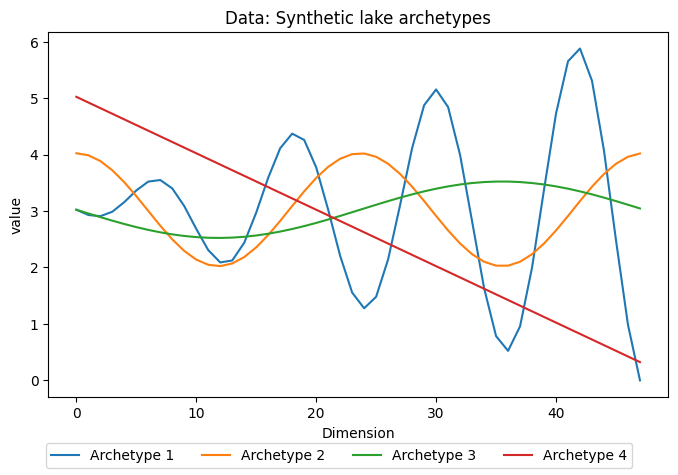

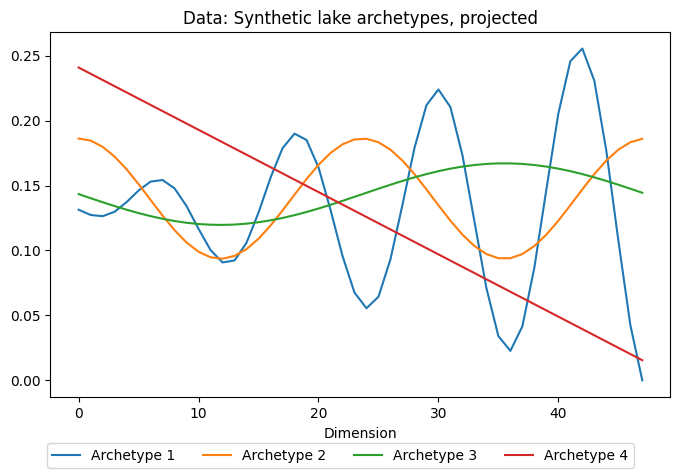

X shape: torch.Size([5000, 48])
Model DAA
Archetype/component 1/9: Set 1/5, Set 2/5, Set 3/5, Set 4/5, Set 5/5,  
Archetype/component 2/9: Set 1/5, Set 2/5, Set 3/5, Set 4/5, Set 5/5,  
Archetype/component 3/9: Set 1/5, Set 2/5, Set 3/5, Set 4/5, Set 5/5,  
Archetype/component 4/9: Set 1/5, Set 2/5, Set 3/5, Set 4/5, Set 5/5,  
Archetype/component 5/9: Set 1/5, Set 2/5, Set 3/5, Set 4/5, Set 5/5,  
Archetype/component 6/9: Set 1/5, Set 2/5, Set 3/5, Set 4/5, Set 5/5,  
Archetype/component 7/9: Set 1/5, Set 2/5, Set 3/5, Set 4/5, Set 5/5,  
Archetype/component 8/9: Set 1/5, Set 2/5, Set 3/5, Set 4/5, Set 5/5,  
Archetype/component 9/9: Set 1/5, Set 2/5, Set 3/5, Set 4/5, Set 5/5,  
saved DAA dict
Model AA
Archetype/component 1/9: Set 1/5, Set 2/5, Set 3/5, Set 4/5, Set 5/5,  
Archetype/component 2/9: Set 1/5, Set 2/5, Set 3/5, Set 4/5, Set 5/5,  
Archetype/component 3/9: Set 1/5, Set 2/5, Set 3/5, Set 4/5, Set 5/5,  
Archetype/component 4/9: Set 1/5, Set 2/5, Set 3/5, Set 4/5, Set 5/5, 

In [5]:
for data_set in data_list:
    print(data_set)
    # basic values
    archetypes = None
    Strue = None
    X = None
    X_ids = None
    W = None
    new_time = None
    lake=False
    select = False
    
    # get data

    # synthetic 
    if isinstance(data_set, int):
        archetypes, X, Strue, size, alpha = get_synth_data_sample(data_set)
        #plot_data(archetypes,f'Synthetic data {data_set} archetypes', projected=False, arc=True)
        #plot_data(archetypes,f'Synthetic data {data_set} archetypes', projected=True, arc=True)
        #plot_data_sphere(X, archetypes, data_set)
    elif data_set == 'synth lakes':
        size = 5000
        dimension  = 48
        archetypes, X, Strue, size, alpha = get_synth_lake(size,dimension)
        plot_data(archetypes,'Synthetic lake archetypes', projected=False, arc=True)
        plot_data(archetypes,'Synthetic lake archetypes', projected=True, arc=True)
    elif data_set == 'random':
        size = 5000
        dimension  = 48
        X = get_random_data(size,dimension)
    elif 'lake' in data_set: # Lakes
        lake=True
        # get lake data
        with open(f'saves/lake_data_dicts.pkl', 'rb') as f:
            data = pickle.load(f)
        # interpolate data on chosen time interval
        start = 2019
        new_time = np.arange(start,2023,1/12)  
        if 'select' in data_set: # small subset of lakes
            select=True
        X, X_ids, W = full_lake_data_prep(data, new_time, select=select)
        
    
    print(f'X shape: {X.shape}')
    # evaluate models on data
    res = model_eval(K, J, L, n_epoch, data_set, X, X_ids, W, archetypes, Strue, new_time, models, tol, save=True)